In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
rcParams['figure.figsize'] = (14, 10)
rcParams['axes.titlesize'] = 16
rcParams['axes.labelsize'] = 12

# Load the data
df = pd.read_csv("Students depression.csv")

In [6]:
df

,Gender,Age,City,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,GPA
0,Male,33.0,Visakhapatnam,5.0,2.0,'5-6 hours',Healthy,Bachelor,Yes,3.0,1.0,No,1,3.588
1,Female,24.0,Bangalore,2.0,5.0,'5-6 hours',Moderate,Bachelor,No,3.0,2.0,Yes,0,2.360
2,Male,31.0,Srinagar,3.0,5.0,'Less than 5 hours',Healthy,Bachelor,No,9.0,1.0,Yes,0,2.812
3,Female,28.0,Varanasi,3.0,2.0,'7-8 hours',Moderate,Bachelor,Yes,4.0,5.0,Yes,1,2.236
4,Female,25.0,Jaipur,4.0,3.0,'5-6 hours',Moderate,Master,Yes,1.0,1.0,No,0,3.252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35823,Male,21.0,Ahmedabad,1.0,2.0,'More than 8 hours',Moderate,Business,No,8.0,4.0,No,1,1.172
35824,Male,27.0,Visakhapatnam,4.0,3.0,'Less than 5 hours',Moderate,Bachelor,Yes,10.0,1.0,Yes,1,1.432
35825,Female,34.0,Bhopal,2.0,1.0,'More than 8 hours',Moderate,Master,No,8.0,3.0,No,1,1.288
35826,Female,31.0,Chennai,5.0,5.0,'5-6 hours',Unhealthy,Others,Yes,5.0,2.0,No,0,1.848


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35828 entries, 0 to 35827
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 35828 non-null  object 
 1   Age                                    35828 non-null  float64
 2   City                                   35828 non-null  object 
 3   Academic Pressure                      35828 non-null  float64
 4   Study Satisfaction                     35828 non-null  float64
 5   Sleep Duration                         35828 non-null  object 
 6   Dietary Habits                         35828 non-null  object 
 7   Degree                                 35828 non-null  object 
 8   Have you ever had suicidal thoughts ?  35828 non-null  object 
 9   Work/Study Hours                       35828 non-null  float64
 10  Financial Stress                       35828 non-null  float64
 11  Fa

In [ ]:
df['Sleep Duration'].unique()

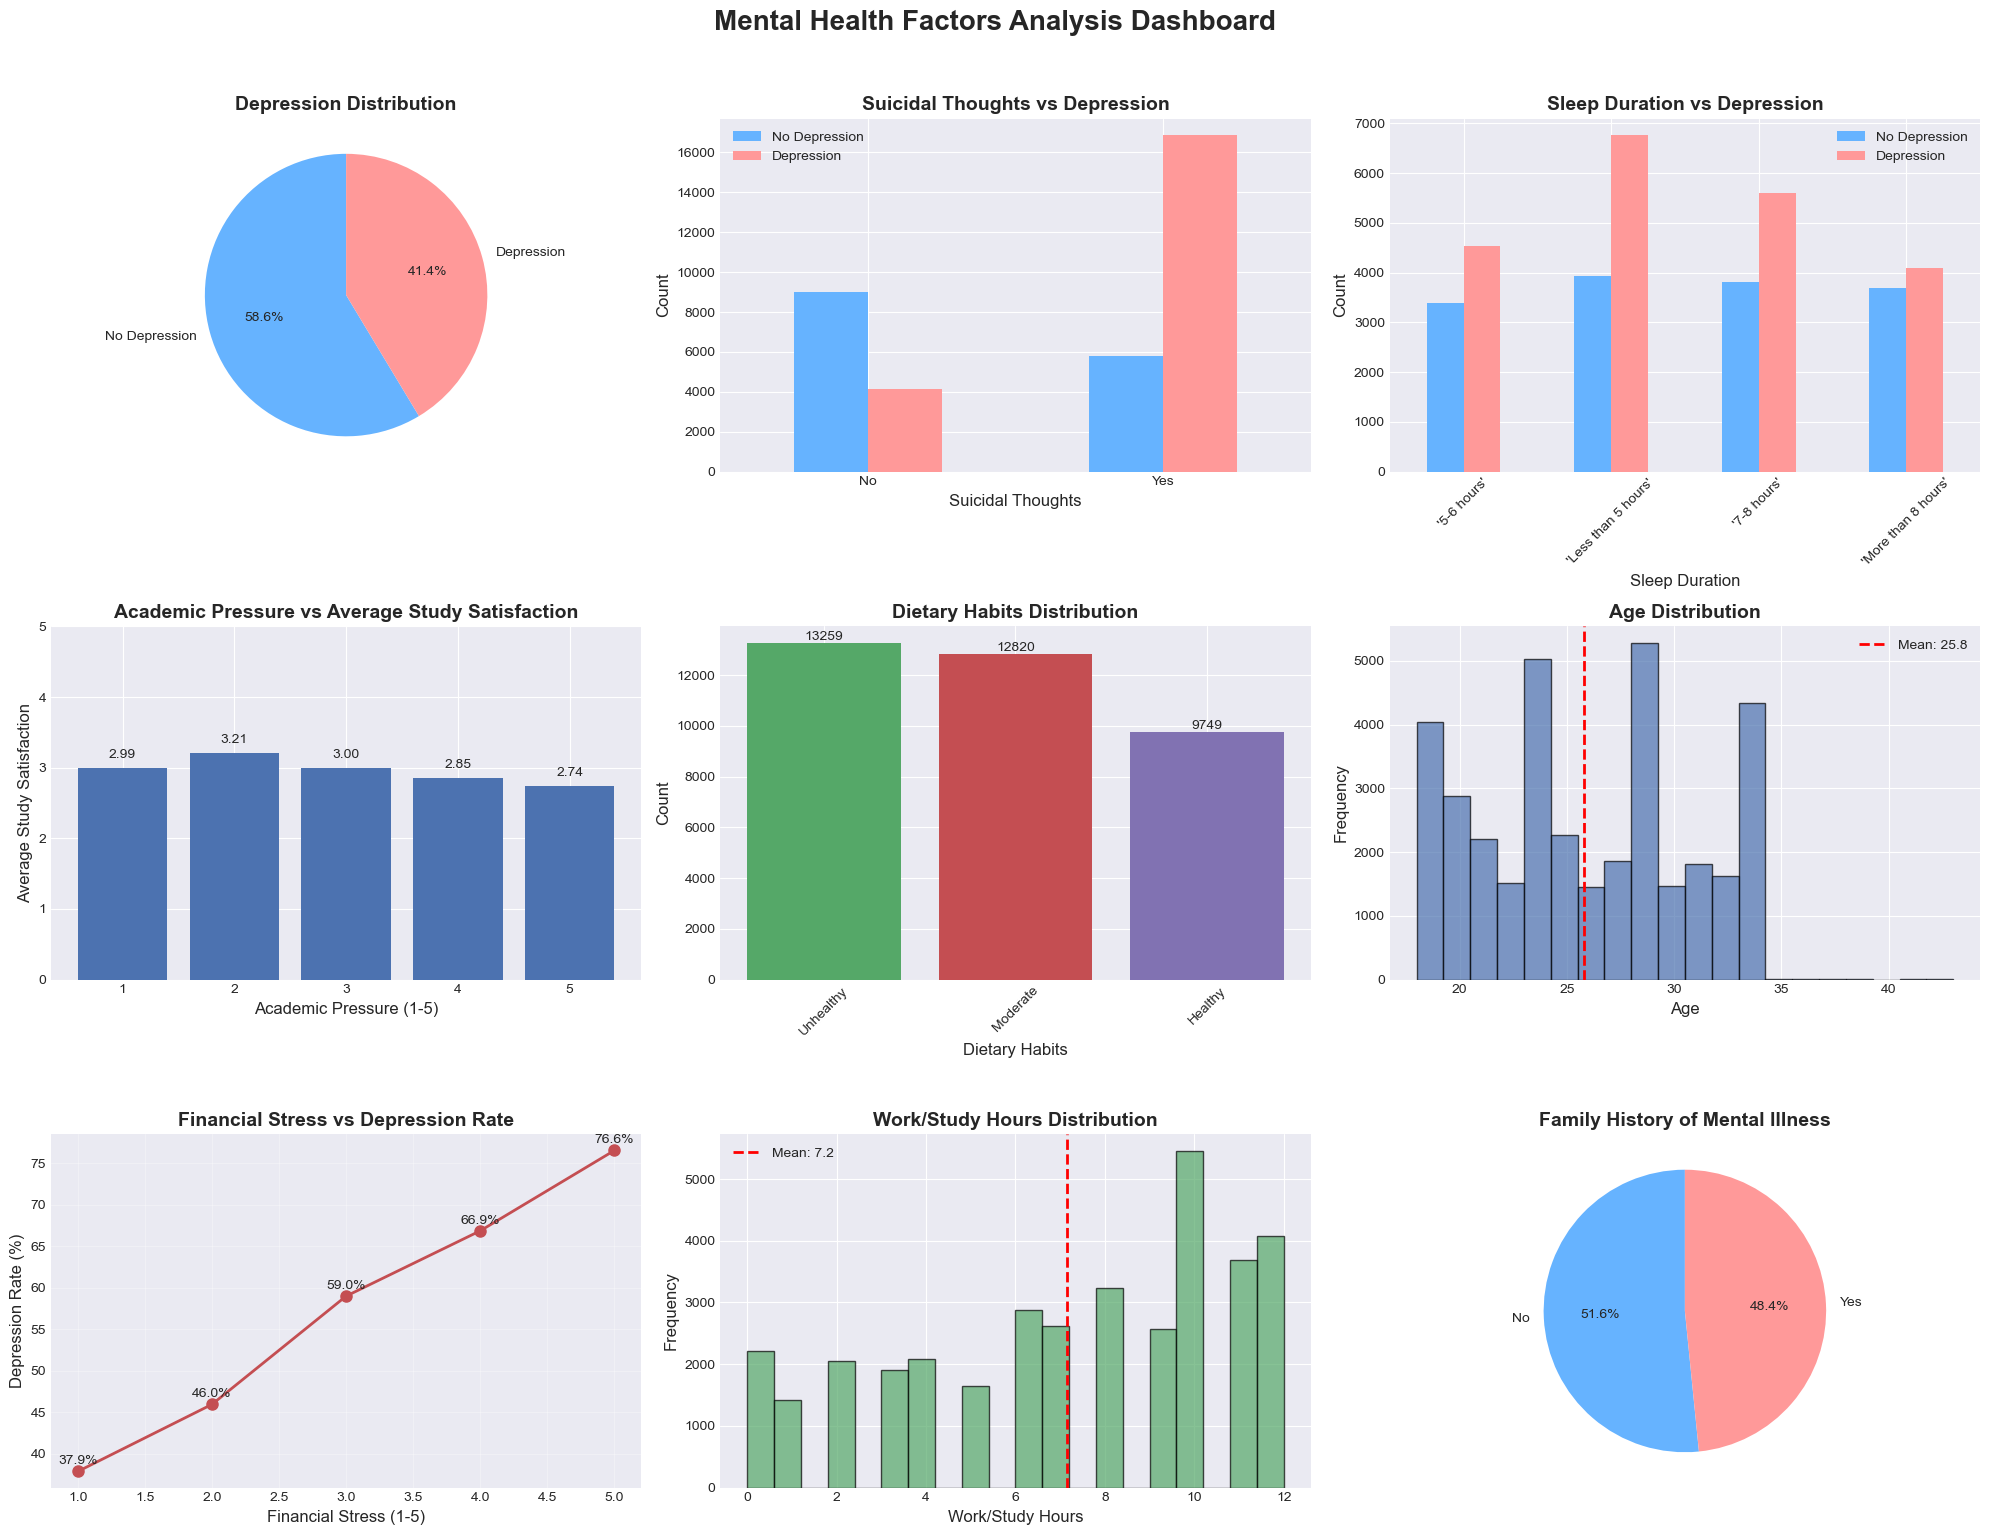

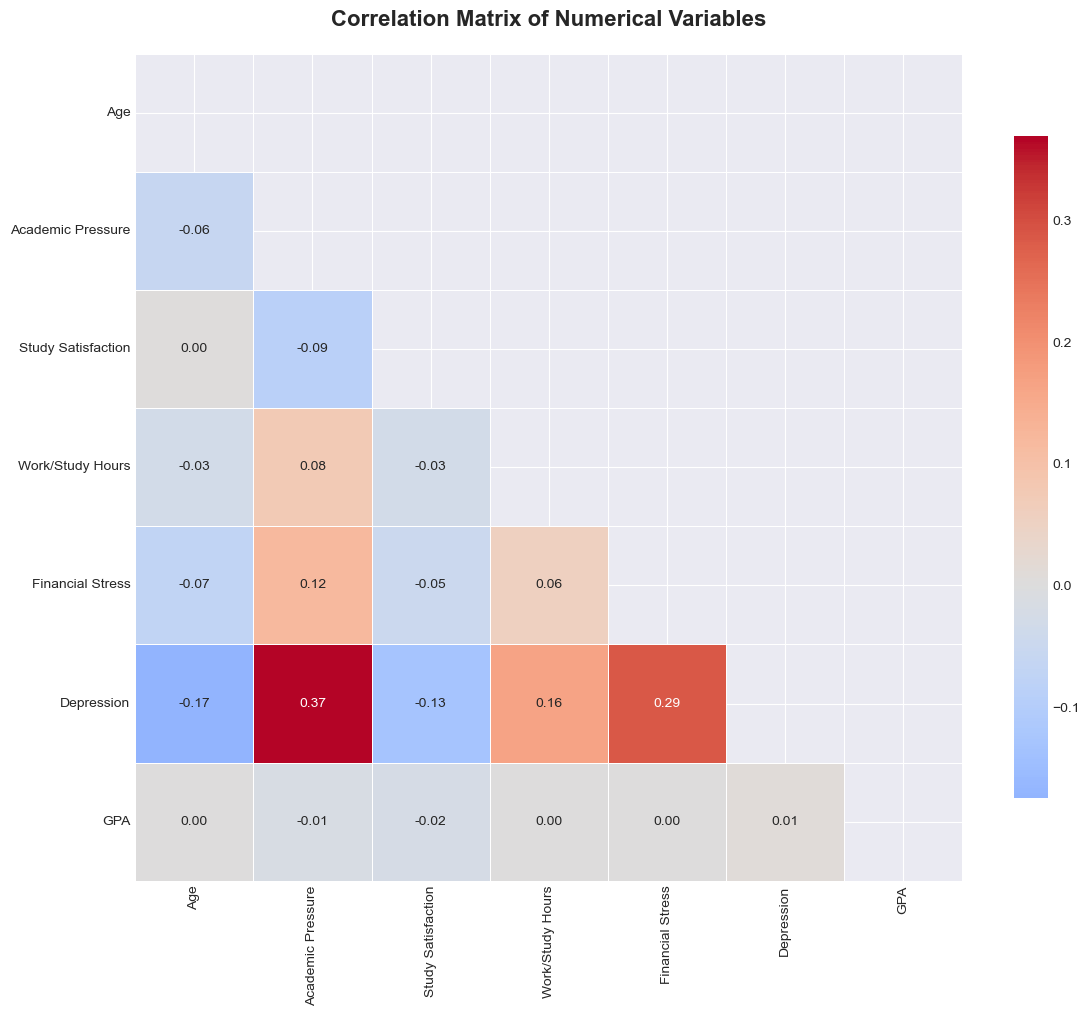

C:\Users\LEGION\AppData\Local\Temp\ipykernel_5076\4219977285.py:107: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Depression', y='GPA', ax=axes[0, 0], palette=['#66b3ff', '#ff9999'])
C:\Users\LEGION\AppData\Local\Temp\ipykernel_5076\4219977285.py:111: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 0].set_xticklabels(['No Depression', 'Depression'])


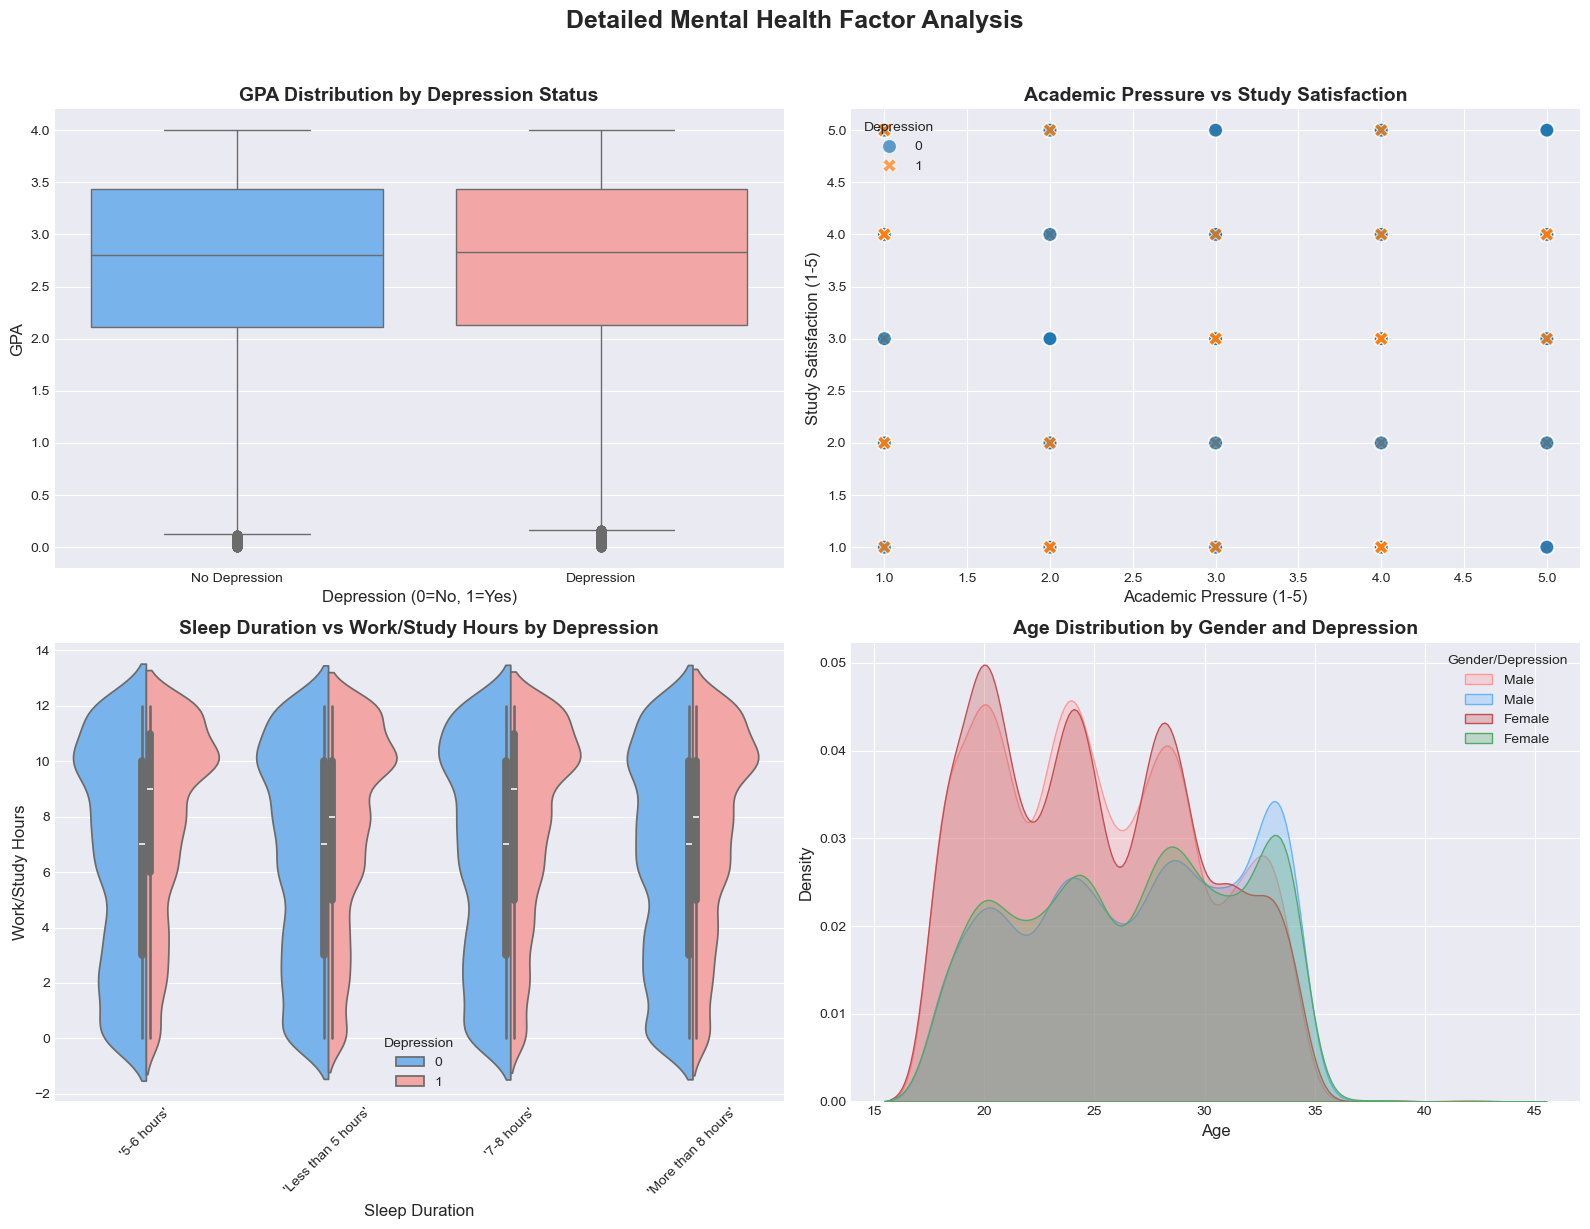

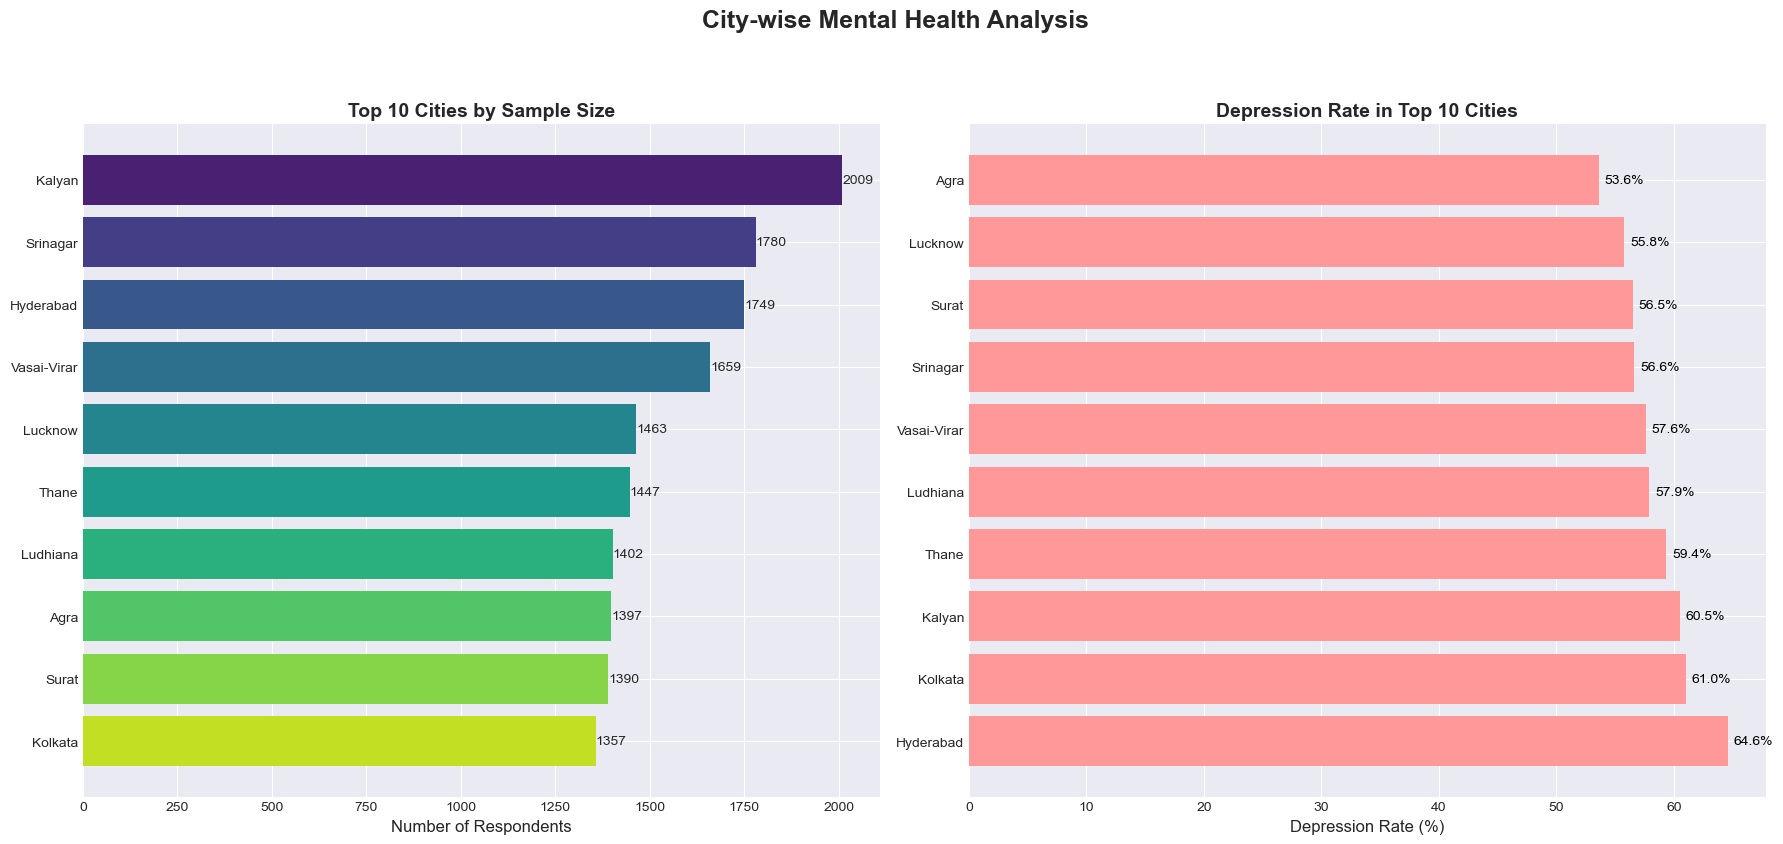

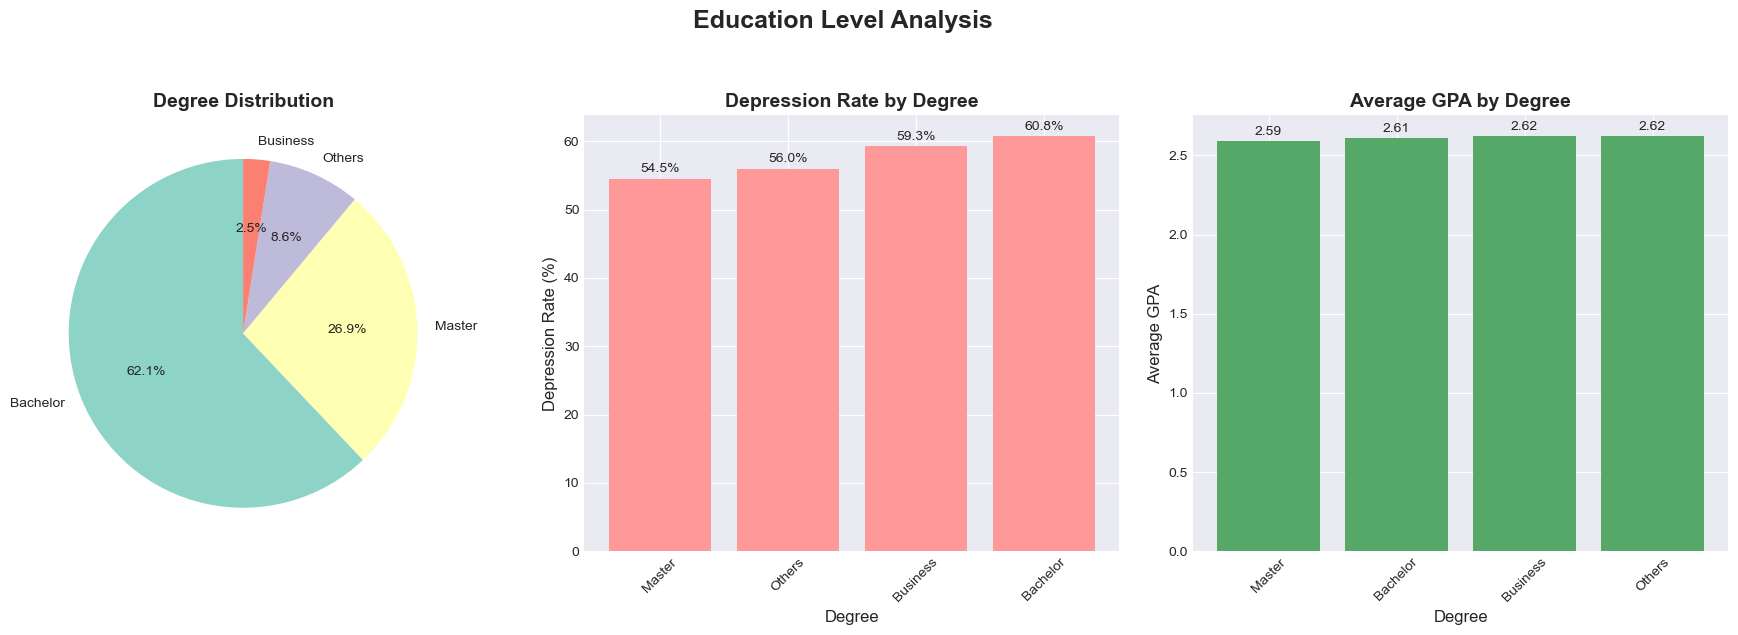

KEY INSIGHTS SUMMARY:
1. Depression Rate: 58.6% of respondents reported depression
2. Suicidal Thoughts: 63.2% reported suicidal thoughts
3. Average Age: 25.8 years
4. Average GPA: 2.61
5. Most Common Sleep Duration: 'Less than 5 hours'
6. Most Common Dietary Habit: Unhealthy


In [5]:


# 1. Create subplots for overview
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
fig.suptitle('Mental Health Factors Analysis Dashboard', fontsize=20, fontweight='bold', y=1.02)

# 1.1 Distribution of Depression
depression_counts = df['Depression'].value_counts()
axes[0, 0].pie(depression_counts.values, labels=['No Depression', 'Depression'], 
               autopct='%1.1f%%', colors=['#66b3ff', '#ff9999'], startangle=90)
axes[0, 0].set_title('Depression Distribution', fontsize=14, fontweight='bold')

# 1.2 Suicidal Thoughts vs Depression
suicidal_depression = pd.crosstab(df['Have you ever had suicidal thoughts ?'], df['Depression'])
suicidal_depression.plot(kind='bar', ax=axes[0, 1], color=['#66b3ff', '#ff9999'])
axes[0, 1].set_title('Suicidal Thoughts vs Depression', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Suicidal Thoughts')
axes[0, 1].set_ylabel('Count')
axes[0, 1].legend(['No Depression', 'Depression'])
axes[0, 1].tick_params(axis='x', rotation=0)

# 1.3 Sleep Duration Distribution by Depression
sleep_order = ["'5-6 hours'", "'Less than 5 hours'", "'7-8 hours'",
       "'More than 8 hours'"]
sleep_depression = pd.crosstab(df['Sleep Duration'], df['Depression']).reindex(sleep_order)
sleep_depression.plot(kind='bar', ax=axes[0, 2], color=['#66b3ff', '#ff9999'])
axes[0, 2].set_title('Sleep Duration vs Depression', fontsize=14, fontweight='bold')
axes[0, 2].set_xlabel('Sleep Duration')
axes[0, 2].set_ylabel('Count')
axes[0, 2].legend(['No Depression', 'Depression'])
axes[0, 2].tick_params(axis='x', rotation=45)

# 1.4 Academic Pressure vs Study Satisfaction
pressure_satisfaction = df.groupby('Academic Pressure')['Study Satisfaction'].mean()
axes[1, 0].bar(pressure_satisfaction.index, pressure_satisfaction.values, color='#4c72b0')
axes[1, 0].set_title('Academic Pressure vs Average Study Satisfaction', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Academic Pressure (1-5)')
axes[1, 0].set_ylabel('Average Study Satisfaction')
axes[1, 0].set_ylim(0, 5)
for i, v in enumerate(pressure_satisfaction.values):
    axes[1, 0].text(i+1, v+0.1, f'{v:.2f}', ha='center', va='bottom')

# 1.5 Dietary Habits Distribution
diet_counts = df['Dietary Habits'].value_counts()
axes[1, 1].bar(diet_counts.index, diet_counts.values, color=['#55a868', '#c44e52', '#8172b2'])
axes[1, 1].set_title('Dietary Habits Distribution', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Dietary Habits')
axes[1, 1].set_ylabel('Count')
axes[1, 1].tick_params(axis='x', rotation=45)
for i, v in enumerate(diet_counts.values):
    axes[1, 1].text(i, v+5, str(v), ha='center', va='bottom')

# 1.6 Age Distribution
axes[1, 2].hist(df['Age'].dropna(), bins=20, color='#4c72b0', edgecolor='black', alpha=0.7)
axes[1, 2].set_title('Age Distribution', fontsize=14, fontweight='bold')
axes[1, 2].set_xlabel('Age')
axes[1, 2].set_ylabel('Frequency')
axes[1, 2].axvline(df['Age'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["Age"].mean():.1f}')
axes[1, 2].legend()

# 1.7 Financial Stress vs Depression
financial_depression = df.groupby('Financial Stress')['Depression'].mean() * 100
axes[2, 0].plot(financial_depression.index, financial_depression.values, marker='o', linewidth=2, markersize=8, color='#c44e52')
axes[2, 0].set_title('Financial Stress vs Depression Rate', fontsize=14, fontweight='bold')
axes[2, 0].set_xlabel('Financial Stress (1-5)')
axes[2, 0].set_ylabel('Depression Rate (%)')
axes[2, 0].grid(True, alpha=0.3)
for i, v in enumerate(financial_depression.values):
    axes[2, 0].text(i+1, v+0.5, f'{v:.1f}%', ha='center', va='bottom')

# 1.8 Work/Study Hours Distribution
axes[2, 1].hist(df['Work/Study Hours'], bins=20, color='#55a868', edgecolor='black', alpha=0.7)
axes[2, 1].set_title('Work/Study Hours Distribution', fontsize=14, fontweight='bold')
axes[2, 1].set_xlabel('Work/Study Hours')
axes[2, 1].set_ylabel('Frequency')
axes[2, 1].axvline(df['Work/Study Hours'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["Work/Study Hours"].mean():.1f}')
axes[2, 1].legend()

# 1.9 Family History of Mental Illness
family_counts = df['Family History of Mental Illness'].value_counts()
axes[2, 2].pie(family_counts.values, labels=family_counts.index, autopct='%1.1f%%', 
               colors=['#66b3ff', '#ff9999'], startangle=90)
axes[2, 2].set_title('Family History of Mental Illness', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# 2. Correlation Heatmap
fig, ax = plt.subplots(figsize=(12, 10))

# Select only numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[numeric_cols].corr()

# Create mask for upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=.5, cbar_kws={"shrink": .8}, ax=ax)
ax.set_title('Correlation Matrix of Numerical Variables', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# 3. Detailed Analysis of Key Factors
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Detailed Mental Health Factor Analysis', fontsize=18, fontweight='bold', y=1.02)

# 3.1 GPA Distribution by Depression Status
sns.boxplot(data=df, x='Depression', y='GPA', ax=axes[0, 0], palette=['#66b3ff', '#ff9999'])
axes[0, 0].set_title('GPA Distribution by Depression Status', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Depression (0=No, 1=Yes)')
axes[0, 0].set_ylabel('GPA')
axes[0, 0].set_xticklabels(['No Depression', 'Depression'])

# 3.2 Academic Pressure vs Study Satisfaction by Depression
sns.scatterplot(data=df, x='Academic Pressure', y='Study Satisfaction', 
                hue='Depression', style='Depression', s=100, alpha=0.7, ax=axes[0, 1])
axes[0, 1].set_title('Academic Pressure vs Study Satisfaction', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Academic Pressure (1-5)')
axes[0, 1].set_ylabel('Study Satisfaction (1-5)')
axes[0, 1].legend(title='Depression')

# 3.3 Sleep Duration vs Work Hours by Depression
sleep_numeric = pd.Categorical(df['Sleep Duration'], 
                               categories=['Less than 5 hours', '5-6 hours', '7-8 hours', 'More than 8 hours'], 
                               ordered=True)
df['Sleep_Numeric'] = sleep_numeric.codes

sns.violinplot(data=df, x='Sleep Duration', y='Work/Study Hours', 
               hue='Depression', split=True, ax=axes[1, 0], 
               order=sleep_order, palette=['#66b3ff', '#ff9999'])
axes[1, 0].set_title('Sleep Duration vs Work/Study Hours by Depression', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Sleep Duration')
axes[1, 0].set_ylabel('Work/Study Hours')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].legend(title='Depression')

# 3.4 Age Distribution by Gender and Depression
sns.kdeplot(data=df[df['Gender'] == 'Male'], x='Age', hue='Depression', 
            ax=axes[1, 1], palette=['#66b3ff', '#ff9999'], label='Male', fill=True, alpha=0.3)
sns.kdeplot(data=df[df['Gender'] == 'Female'], x='Age', hue='Depression', 
            ax=axes[1, 1], palette=['#55a868', '#c44e52'], label='Female', fill=True, alpha=0.3)
axes[1, 1].set_title('Age Distribution by Gender and Depression', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Age')
axes[1, 1].set_ylabel('Density')
axes[1, 1].legend(title='Gender/Depression')

plt.tight_layout()
plt.show()

# 4. City-wise Analysis (Top 10 cities)
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
fig.suptitle('City-wise Mental Health Analysis', fontsize=18, fontweight='bold', y=1.05)

# 4.1 Top 10 Cities by Sample Size
city_counts = df['City'].value_counts().head(10)
axes[0].barh(city_counts.index, city_counts.values, color=sns.color_palette('viridis', len(city_counts)))
axes[0].set_title('Top 10 Cities by Sample Size', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Number of Respondents')
axes[0].invert_yaxis()
for i, v in enumerate(city_counts.values):
    axes[0].text(v + 0.5, i, str(v), va='center')

# 4.2 Depression Rate in Top 10 Cities
top_cities = city_counts.index.tolist()
city_depression_rate = df[df['City'].isin(top_cities)].groupby('City')['Depression'].mean().sort_values() * 100

axes[1].barh(city_depression_rate.index, city_depression_rate.values, 
            color=['#ff9999' if x > 50 else '#66b3ff' for x in city_depression_rate.values])
axes[1].set_title('Depression Rate in Top 10 Cities', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Depression Rate (%)')
axes[1].invert_yaxis()
for i, v in enumerate(city_depression_rate.values):
    color = 'black' if v > 50 else 'black'
    axes[1].text(v + 0.5, i, f'{v:.1f}%', va='center', color=color)

plt.tight_layout()
plt.show()

# 5. Degree-wise Analysis
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Education Level Analysis', fontsize=18, fontweight='bold', y=1.05)

# 5.1 Degree Distribution
degree_counts = df['Degree'].value_counts()
axes[0].pie(degree_counts.values, labels=degree_counts.index, autopct='%1.1f%%', 
            colors=sns.color_palette('Set3', len(degree_counts)), startangle=90)
axes[0].set_title('Degree Distribution', fontsize=14, fontweight='bold')

# 5.2 Depression Rate by Degree
degree_depression = df.groupby('Degree')['Depression'].mean().sort_values() * 100
bars = axes[1].bar(degree_depression.index, degree_depression.values, 
                  color=['#ff9999' if x > 50 else '#66b3ff' for x in degree_depression.values])
axes[1].set_title('Depression Rate by Degree', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Degree')
axes[1].set_ylabel('Depression Rate (%)')
axes[1].tick_params(axis='x', rotation=45)
for bar, v in zip(bars, degree_depression.values):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height + 0.5,
                f'{v:.1f}%', ha='center', va='bottom')

# 5.3 Average GPA by Degree
degree_gpa = df.groupby('Degree')['GPA'].mean().sort_values()
bars = axes[2].bar(degree_gpa.index, degree_gpa.values, color='#55a868')
axes[2].set_title('Average GPA by Degree', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Degree')
axes[2].set_ylabel('Average GPA')
axes[2].tick_params(axis='x', rotation=45)
for bar, v in zip(bars, degree_gpa.values):
    height = bar.get_height()
    axes[2].text(bar.get_x() + bar.get_width()/2., height + 0.02,
                f'{v:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("="*80)
print("KEY INSIGHTS SUMMARY:")
print("="*80)
print(f"1. Depression Rate: {df['Depression'].mean()*100:.1f}% of respondents reported depression")
print(f"2. Suicidal Thoughts: {df['Have you ever had suicidal thoughts ?'].value_counts(normalize=True)['Yes']*100:.1f}% reported suicidal thoughts")
print(f"3. Average Age: {df['Age'].mean():.1f} years")
print(f"4. Average GPA: {df['GPA'].mean():.2f}")
print(f"5. Most Common Sleep Duration: {df['Sleep Duration'].mode()[0]}")
print(f"6. Most Common Dietary Habit: {df['Dietary Habits'].mode()[0]}")
print("="*80)

In [6]:
df.columns

Index(['Gender', 'Age', 'City', 'Academic Pressure', 'Study Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression',
       'GPA', 'Sleep_Numeric'],
      dtype='object')

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import timeit

# ======================
#  Split X & y
# ======================
x = df.drop("Depression", axis=1)
y = df["Depression"]

# ======================
# Cat & Num Columns
# ======================
cat_col = x.select_dtypes(include=['object']).columns.tolist()
num_col = x.select_dtypes(include=['int64','float64','float32']).columns.tolist()

# ======================
# Preprocessor
# ======================
preprocessor = ColumnTransformer(transformers=[
        ('encoder', OneHotEncoder(handle_unknown='ignore'), cat_col),
        ('scaler', RobustScaler(), num_col)
])


# ======================
# Pipeline
# ======================
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', SVC())
])

# ======================
# Grid Search
# ======================
param_grid_svc = {
    'model__C': [1],
    'model__kernel': ['poly'],
    'model__gamma': ['scale', 'auto'],
    'model__degree': [3]
}

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid_svc,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2,
    return_train_score=True
)

# ======================
# Training + Timing
# ======================
start = timeit.default_timer()
grid_search.fit(x, y)
stop = timeit.default_timer()

print("⏱ Training Time:", stop - start)
print("🏆 Best Score:", grid_search.best_score_)
print("🔧 Best Params:", grid_search.best_params_)
